In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("ENB2012_data.csv")

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

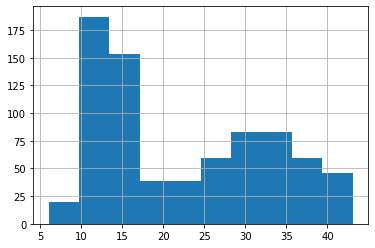

In [7]:
#Нагрузка при обогреве
df["Y1"].hist()

In [8]:
X = df.drop('Y1', axis = 1)
y=  df['Y1']

In [1]:
import seaborn as sns
#не работает как ни пытался
#upd: заработало

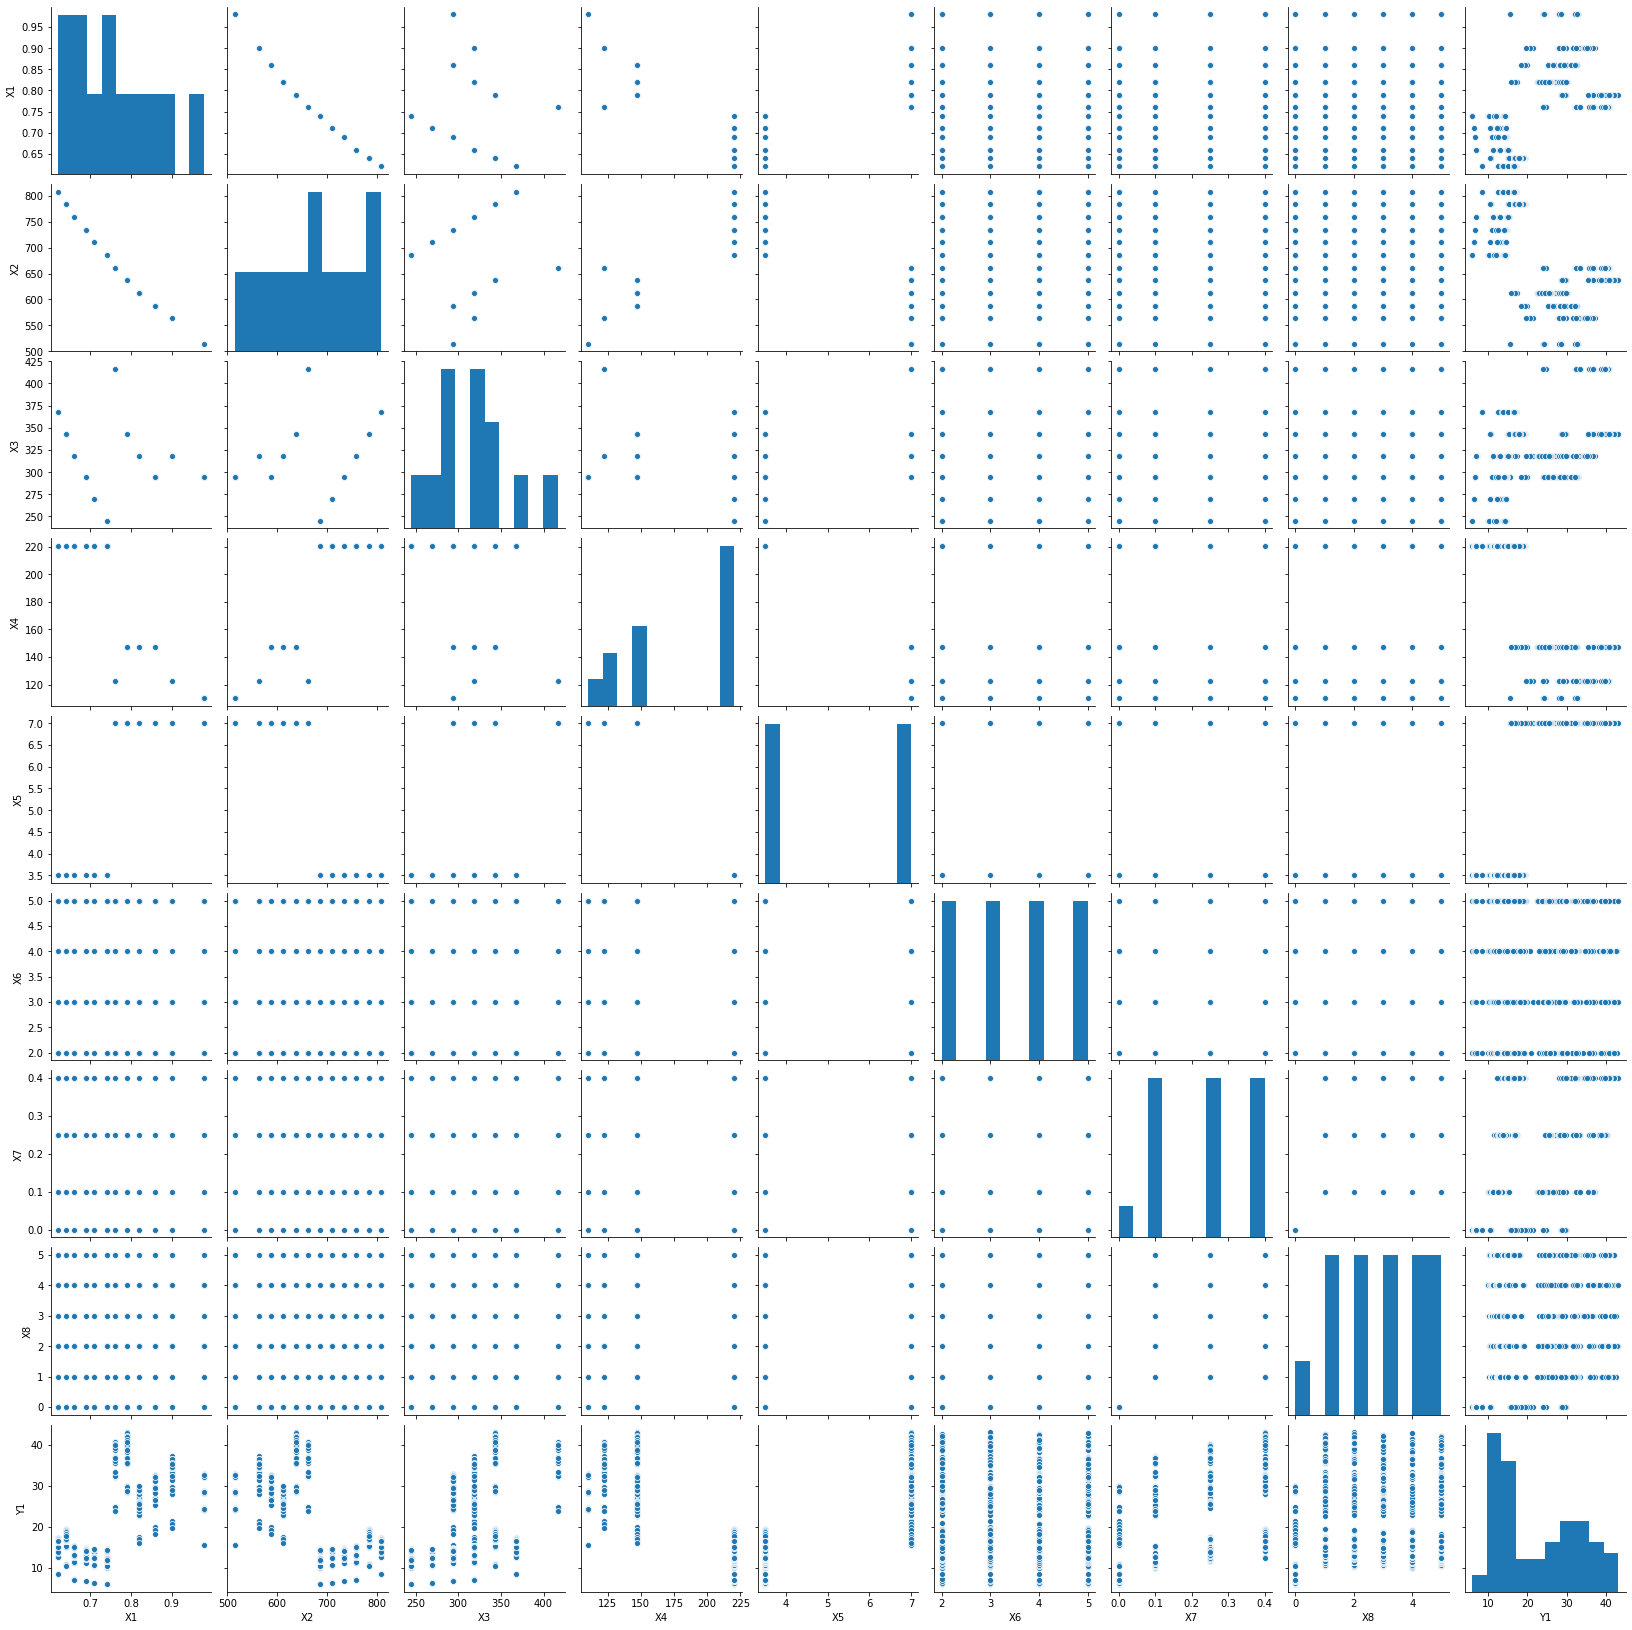

In [7]:
sns.pairplot(df, height=2.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128AC928>,
      dtype=object)

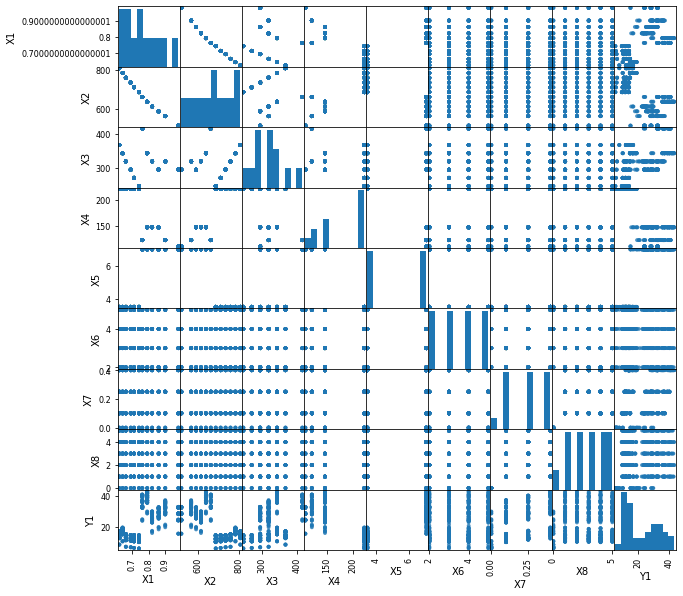

In [16]:
#нашел другой способ
pd.plotting.scatter_matrix(df, figsize=(10,10), marker = '.', hist_kwds = {}, s = 60, alpha = 0.8)

In [9]:
#Выбросим часть столбцов 
data=df[['X1', 'X2', 'X3', 'X7','Y1']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144E2EF8>,
      dtype=object)

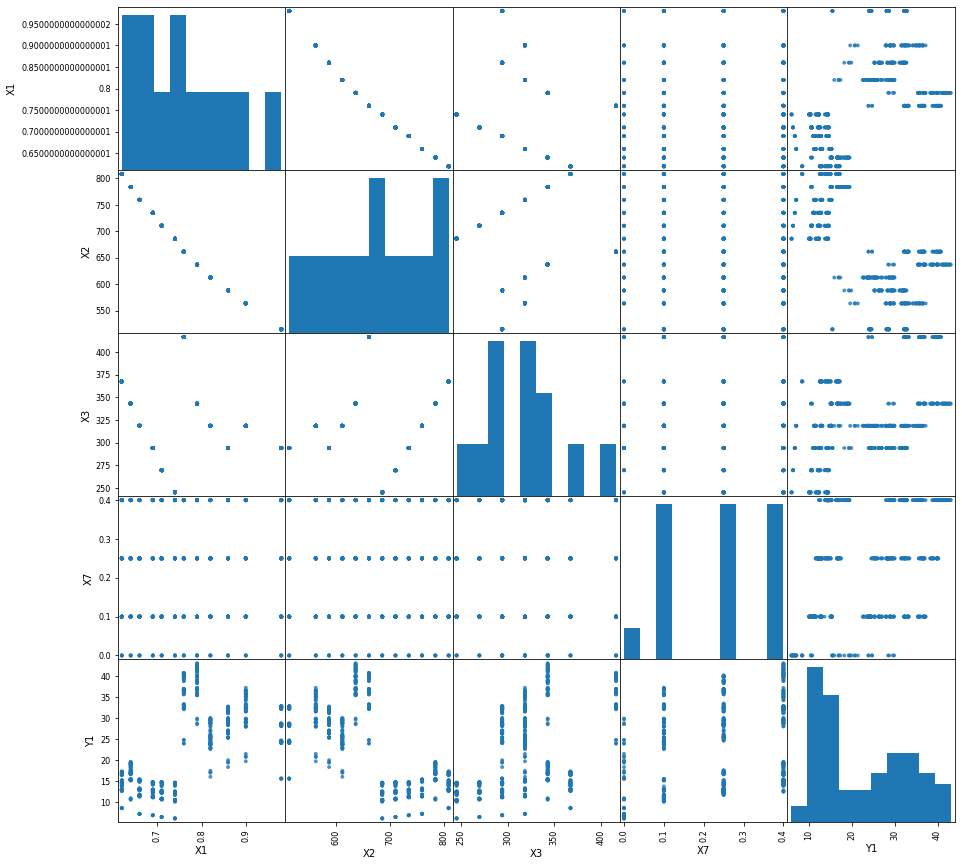

In [21]:
pd.plotting.scatter_matrix(data, figsize=(15,15), marker = '.', hist_kwds = {}, s = 60, alpha = 0.8)

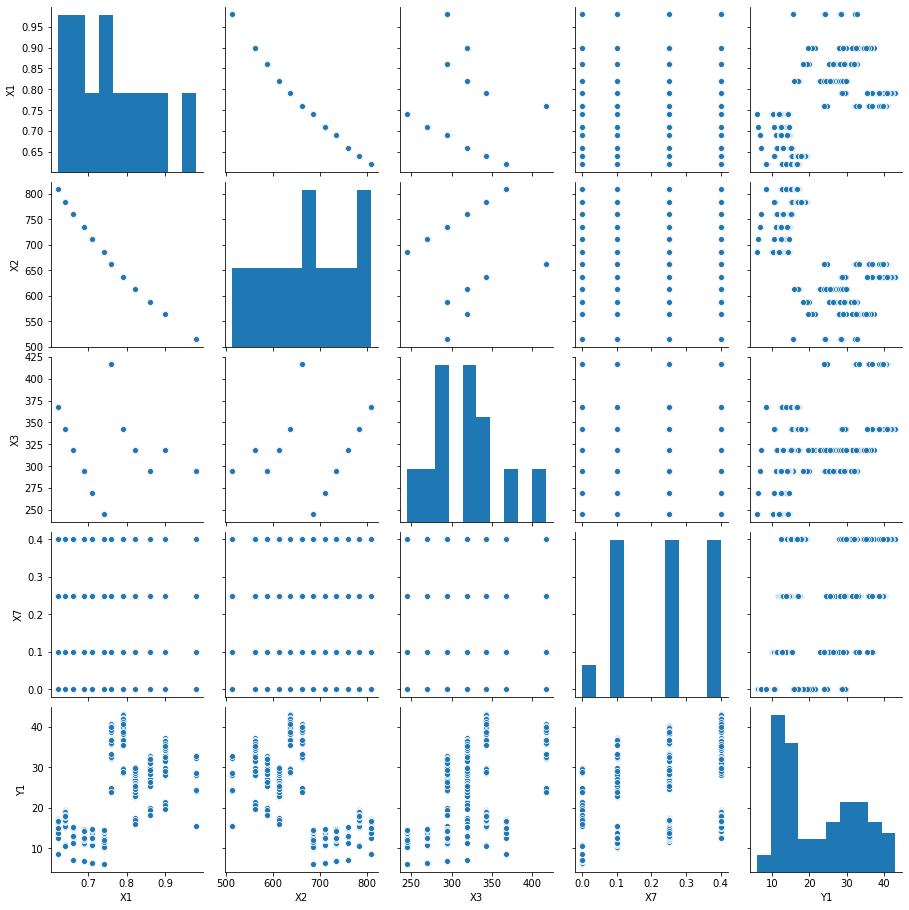

In [10]:
sns.pairplot(data, height=2.5)

In [11]:
#Подключаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Разделение данных на тестовую и тренировочную выборки
#Подключаем функцию разделения данных
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size = 0.3)

#Данные в X, здесь выбросили из датафрейма столбец "medv", axis = 1 указывает, что работа со столбцом
X_train=df_train.drop('Y1', axis = 1)
X_test=df_test.drop('Y1', axis = 1)

#Целевая переменная в y
y_train=df_train['Y1']
y_test=df_test['Y1']

In [12]:
#Подключаем метод Линейной регрессии для работы
from sklearn.linear_model import LinearRegression
# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке 
y_test_predict = model_regression.predict(X_test)

import numpy as np

#метрики качества для регрессии
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
#Печать строки 'RMSE is {}', на месте {} будет подставляться rmse
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = model_regression.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
#чем ближе к 0 тем лучше
print('RMSE is {}'.format(rmse))
#чем ближе к 1 тем лучше
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.876598948673014
R2 score is 0.9180212776650593


The model performance for testing set
--------------------------------------
RMSE is 3.0917910446025547
R2 score is 0.907544426682465
